Part 2: ML Model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm
import gc
gc.collect()
sns.set_style("whitegrid", {'axes.grid' : False})
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [ ]:
# we are using cleaned Data
df_origin_train = pd.read_csv('train.csv')
df_train = df_origin_train.copy()

df_origin_test = pd.read_csv('test.csv')
df_test = df_origin_test.copy()

# Verify the load was successful
print(f"Train set loaded: {df_train.shape}")
print(f"Test set loaded: {df_test.shape}")

Train set loaded: (100000, 28)
Test set loaded: (50000, 27)


In [ ]:
df_train.head(8).T

,0,1,2,3,4,5,6,7
ID,5634,5635,5636,5637,5638,5639,5640,5641
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392
Month,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

In [ ]:
# Drop the Columns we not use in model
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


In [ ]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28103
Credit_Score,100000,3,Standard,53174


In [ ]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,13943


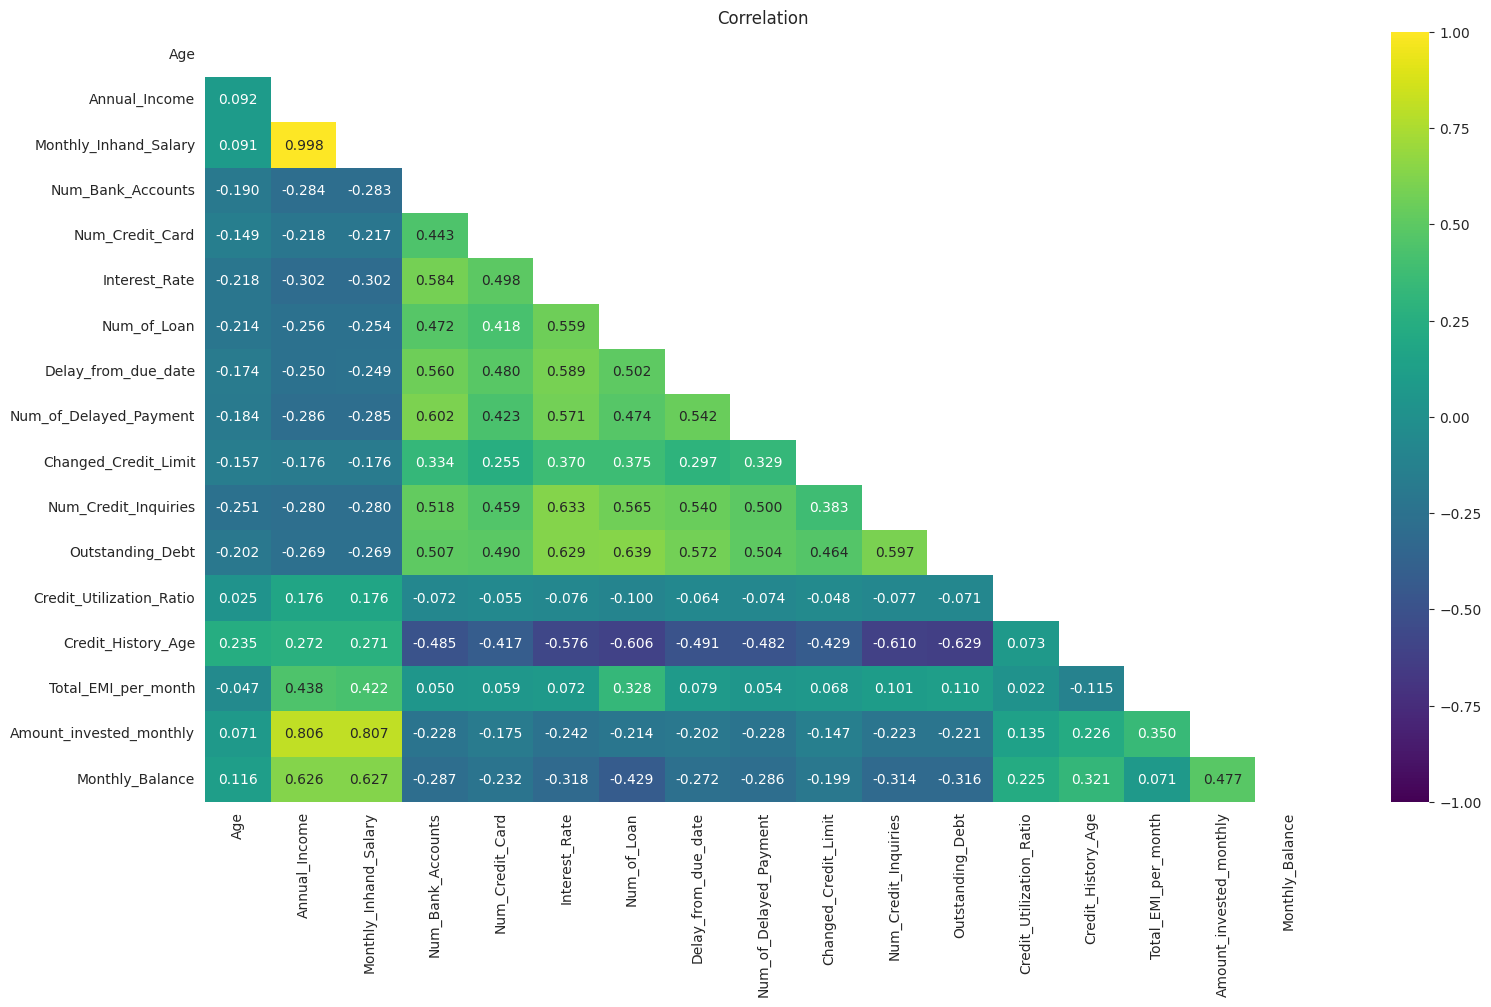

In [ ]:

plt.figure(figsize=(18, 10))
corr_matrix = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,           # Hides the top half
    annot=True,          # Shows the numbers in each box
    fmt=".3f",           # Limits decimals to match your 'f' format
    vmin=-1, vmax=1,     # Sets the scale from -1 to 1
    cmap="viridis",         # Uses the Pink/Green color scheme from your image
    center=0
)

plt.title("Correlation")
plt.show()

03. Multi-class Classification Data Pre-Processing

In [ ]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# conda install -c conda-forge xgboost
from xgboost import XGBClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
# Updated Supervised-Classifier-metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Replaces plot_confusion_matrix -> ConfusionMatrixDisplay.from_estimator

from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
# Replaces plot_roc_curve -> RocCurveDisplay.from_estimator

from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
# Replaces plot_precision_recall_curve -> PrecisionRecallDisplay.from_estimator

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

random_state = 42

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [ ]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

,proportion
Credit_Score,
Good,0.178
Poor,0.290
Standard,0.532


In [ ]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape,

((80000, 22), (80000,), (20000, 22), (20000,), (50000, 22))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


,count
0,
0,14301
1,23124
2,42575


In [ ]:
# our focus group
le.inverse_transform([1])

array(['Poor'], dtype=object)

Dummy Operation

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep

    # Return self nothing else to do here
    def fit(self, X, y  = None):
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]

        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self

    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
        return X_transformed

    # to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

In [ ]:
# check for columns containing commas
[col for col in X_train.select_dtypes('O').columns if X_train[col].str.contains(',', regex=True).any()]

['Type_of_Loan']

In [ ]:
dummy = GetDummies()

X_train_dummy = dummy.fit_transform(X_train)
X_val_dummy   = dummy.transform(X_val)

X_train_dummy.shape, X_val_dummy.shape

((80000, 31), (20000, 31))

In [ ]:
X_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 75220 to 15795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          80000 non-null  float64
 1   Occupation                   80000 non-null  object 
 2   Annual_Income                80000 non-null  float64
 3   Monthly_Inhand_Salary        80000 non-null  float64
 4   Num_Bank_Accounts            80000 non-null  float64
 5   Num_Credit_Card              80000 non-null  float64
 6   Interest_Rate                80000 non-null  float64
 7   Num_of_Loan                  80000 non-null  float64
 8   Delay_from_due_date          80000 non-null  float64
 9   Num_of_Delayed_Payment       80000 non-null  float64
 10  Changed_Credit_Limit         80000 non-null  float64
 11  Num_Credit_Inquiries         80000 non-null  float64
 12  Credit_Mix                   80000 non-null  object 
 13  Outstanding_Debt 

OneHotEncoder and LabelEncoder
Nominal data represents categories without any inherent order or hierarchy. Each category is independent of others. One-hot encoding is commonly used for nominal data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1. Identify categorical columns (e.g., Occupation, Credit_Mix)
cat = X_train_dummy.select_dtypes(include="object").columns.tolist()
print('OneHotEncoder columns:', cat)

# 2. FIX: Rename 'sparse' to 'sparse_output'
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 3. Transform and create DataFrames
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]),
    index = X_train_dummy.index,
    columns = ohe.get_feature_names_out(cat)
)

X_val_cat = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]),
    index = X_val_dummy.index,
    columns = ohe.get_feature_names_out(cat)
)

# 4. Join back with the numeric features (Age, Income, etc.)
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

print(f"New Shapes: Train {X_train_ohe.shape}, Val {X_val_ohe.shape}")

OneHotEncoder columns: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
New Shapes: Train (80000, 54), Val (20000, 54)


In [ ]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

Scale data

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)

Define Model Evaluation Functions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
}
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall']
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, response_method='predict', average=None, labels=[1])

In [ ]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train),
            y = y_train)
))
class_weights

{np.int64(0): np.float64(1.8646714681956973),
 np.int64(1): np.float64(1.153203021391916),
 np.int64(2): np.float64(0.6263456645136034)}

In [ ]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([0.62634566, 1.86467147, 1.15320302])

In [ ]:
from collections import Counter

counter = Counter(y_train)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/count for class_id, count in counter.items()}
class_weights

{np.int64(2): 1.0,
 np.int64(0): 2.977064540941193,
 np.int64(1): 1.841160698841031}

In [ ]:
pd.value_counts(y_train, normalize=True).sort_index()

/tmp/ipython-input-4125213372.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train, normalize=True).sort_index()


,proportion
0,0.179
1,0.289
2,0.532


In [ ]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights

/tmp/ipython-input-1430505630.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_proportions = pd.value_counts(y_train, normalize=True)


,proportion
2,1.000
1,1.841
0,2.977


OrdinalEncoder
Ordinal data represents categories with a specific order or hierarchy. Ordinal encoding is suitable for ordinal data.

In [ ]:
import sklearn; print(sklearn.__version__)

1.6.1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()
print('OrdinalEncoder:', cat)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index,
    columns = enc.feature_names_in_
)
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index,
    columns = enc.feature_names_in_
)
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 31), (20000, 31))

In [ ]:
X_train_enc.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan',
       'ToL_credit-builder loan', 'ToL_debt consolidation loan',
       'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified',
       'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

XGBoost Model

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=random_state,
)

In [ ]:
%%time
xgb.fit(X_train_enc, y_train,
    sample_weight=sample_weight
)
# weight parameter in XGBoost is per instance not per class.

CPU times: user 6.21 s, sys: 165 ms, total: 6.37 s
Wall time: 3.41 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print("XGB MODEL")
eval(xgb, X_train_enc, X_val_enc)

XGB MODEL
TEST
[[3056   40  431]
 [ 361 4905  608]
 [1639 1644 7316]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.74      0.84      0.79      5874
           2       0.88      0.69      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.80      0.76     20000
weighted avg       0.79      0.76      0.77     20000

-------------------------------------------------------
TRAIN
[[13233    65  1003]
 [  911 20583  1630]
 [ 6003  5879 30693]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     14301
           1       0.78      0.89      0.83     23124
           2       0.92      0.72      0.81     42575

    accuracy                           0.81     80000
   macro avg       0.78      0.85      0.80     80000
weighted avg       0.83      0.81      0.81     80000



With Best Parameters (GridsearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators' : [100],
    'learning_rate': np.linspace(0.01, 0.3, 2).round(3),
    'max_depth'    : [5, 6],
#     'reg_alpha'    : [0, 0.5, 1],
#     'reg_lambda'   : [0, 0.5, 1],
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'], # 'neg_log_loss'
    error_score='raise',
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [ ]:
# Get the best hyperparameters
best_params_xgb = grid_model_xgb.best_params_

best_params_xgb, grid_model_xgb.best_score_

({'learning_rate': np.float64(0.3), 'max_depth': 6, 'n_estimators': 100},
 np.float64(0.8355391096979332))

In [ ]:
print("GRID XGB MODEL BALANCED")
eval(grid_model_xgb, X_train_enc, X_val_enc)

GRID XGB MODEL BALANCED
TEST
[[3056   40  431]
 [ 361 4905  608]
 [1639 1644 7316]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.74      0.84      0.79      5874
           2       0.88      0.69      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.80      0.76     20000
weighted avg       0.79      0.76      0.77     20000

-------------------------------------------------------
TRAIN
[[13233    65  1003]
 [  911 20583  1630]
 [ 6003  5879 30693]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     14301
           1       0.78      0.89      0.83     23124
           2       0.92      0.72      0.81     42575

    accuracy                           0.81     80000
   macro avg       0.78      0.85      0.80     80000
weighted avg       0.83      0.81      0.81     80000



In [ ]:
import matplotlib.pyplot as plt
plt.close('all')


 Future Importance XGBoost

In [ ]:
# xgb_model has best scorer default parameters
X_val_enc.columns.shape, xgb.feature_importances_.shape


((31,), (31,))

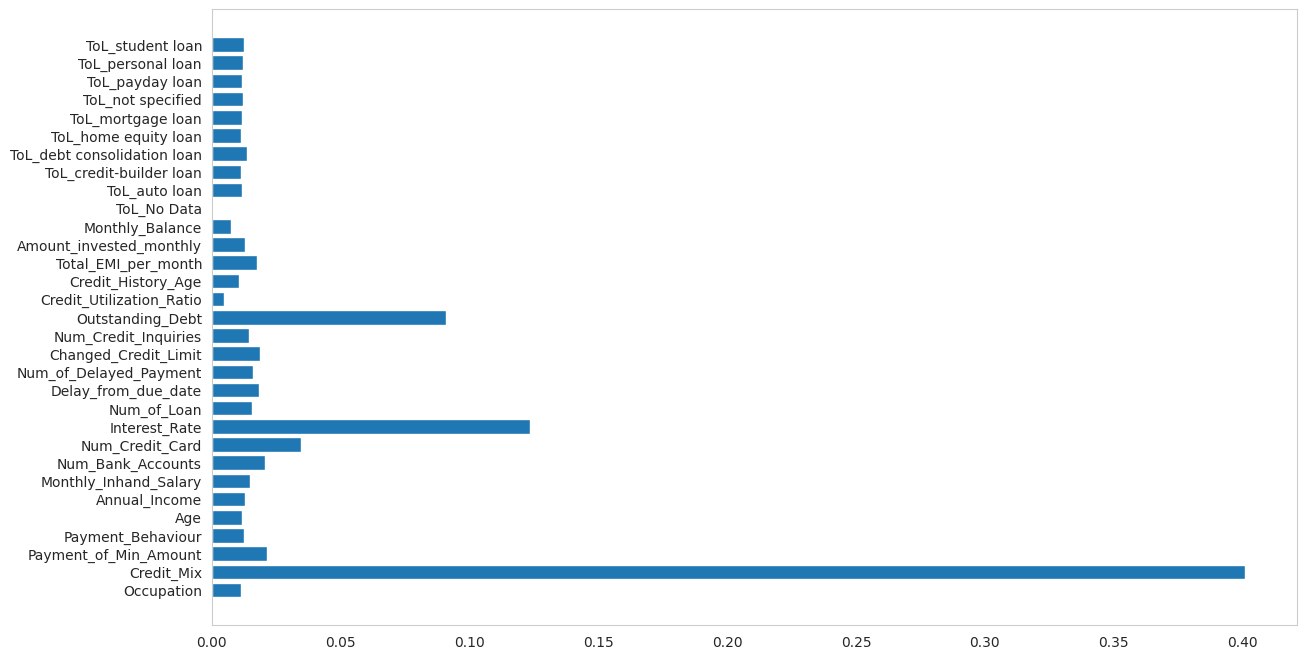

In [ ]:
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns, xgb.feature_importances_);

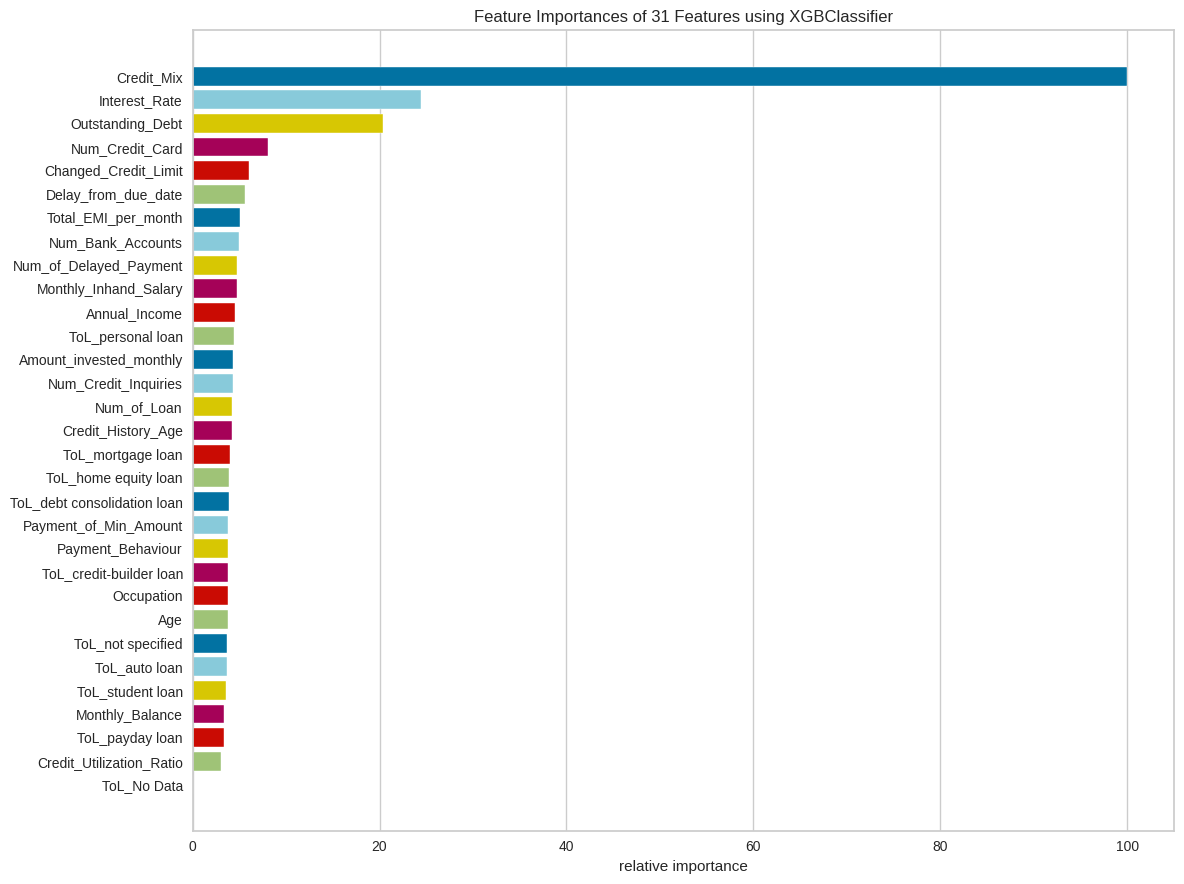

In [ ]:
from yellowbrick.model_selection import feature_importances, FeatureImportances

model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)

plt.subplots(figsize=(12, 9))
# Use the quick method and immediately show the figure
feature_importances(model, X_val_enc, y_val);

Final Model

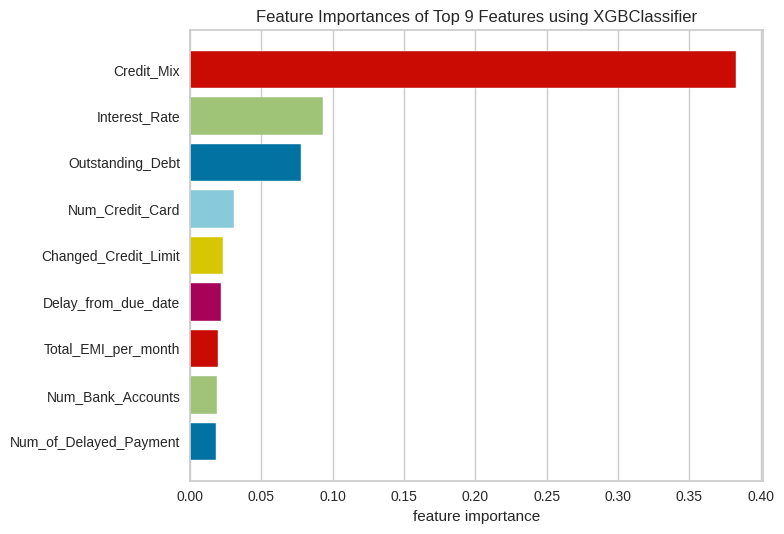

['Num_of_Delayed_Payment' 'Num_Bank_Accounts' 'Total_EMI_per_month'
 'Delay_from_due_date' 'Changed_Credit_Limit' 'Num_Credit_Card'
 'Outstanding_Debt' 'Interest_Rate' 'Credit_Mix']


In [ ]:
model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)
# seect top 8 features
viz = feature_importances(model, X_val_enc, y_val, relative=False, topn=9)

# get top 8 features
print(viz.features_)

In [ ]:
# selected 9 features for final model
df_final = df_train[viz.features_.tolist() + ['Credit_Score']]
df_final

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
1,4.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
2,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
3,4.000,3.000,49.575,5.000,6.270,4.000,809.980,3.000,Good,Good
4,4.000,3.000,49.575,6.000,11.270,4.000,809.980,3.000,Good,Good
...,...,...,...,...,...,...,...,...,...,...
99995,7.000,4.000,35.104,23.000,11.500,6.000,502.380,7.000,Good,Poor
99996,7.000,4.000,35.104,18.000,11.500,6.000,502.380,7.000,Good,Poor
99997,6.000,4.000,35.104,27.000,11.500,6.000,502.380,7.000,Good,Poor
99998,6.000,4.000,35.104,20.000,11.500,6.000,502.380,7.000,Good,Standard


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Num_of_Delayed_Payment  100000 non-null  float64
 1   Num_Bank_Accounts       100000 non-null  float64
 2   Total_EMI_per_month     100000 non-null  float64
 3   Delay_from_due_date     100000 non-null  float64
 4   Changed_Credit_Limit    100000 non-null  float64
 5   Num_Credit_Card         100000 non-null  float64
 6   Outstanding_Debt        100000 non-null  float64
 7   Interest_Rate           100000 non-null  float64
 8   Credit_Mix              100000 non-null  object 
 9   Credit_Score            100000 non-null  object 
dtypes: float64(8), object(2)
memory usage: 7.6+ MB


In [ ]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [ ]:
cat = X.select_dtypes(include="object").columns.to_list()
print('OrdinalEncoder:', cat)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_enc      = X.copy()
X_enc[cat] = enc.fit_transform(X_enc[cat])

X_enc.shape

OrdinalEncoder: ['Credit_Mix']


(100000, 9)

In [ ]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [ ]:
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y)
sample_weight

array([1.86971805, 1.86971805, 1.86971805, ..., 1.14950456, 0.62687278,
       1.14950456])

In [ ]:
final_model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)

              precision    recall  f1-score   support

           0       0.61      0.89      0.72     17828
           1       0.75      0.85      0.79     28998
           2       0.89      0.68      0.77     53174

    accuracy                           0.77    100000
   macro avg       0.75      0.81      0.76    100000
weighted avg       0.80      0.77      0.77    100000



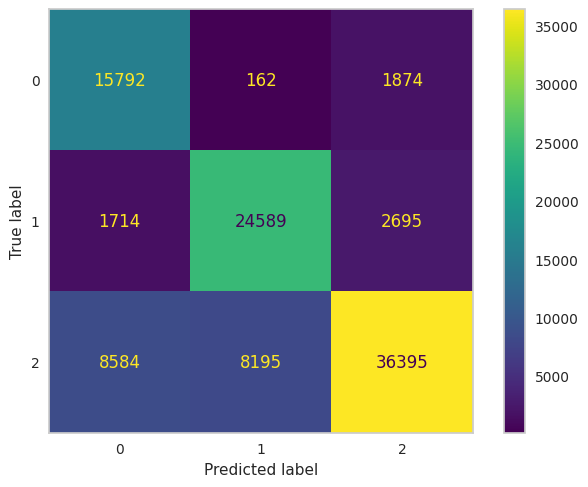

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_enc)

print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(final_model, X_enc, y);

In [ ]:
np.bincount(y_pred)

array([26090, 32946, 40964])

In [ ]:
X.head()

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
1,4.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
2,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
3,4.000,3.000,49.575,5.000,6.270,4.000,809.980,3.000,Good
4,4.000,3.000,49.575,6.000,11.270,4.000,809.980,3.000,Good


In [ ]:
X.describe()

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,13.313,5.369,107.699,21.081,10.470,5.534,1426.220,14.532
std,6.237,2.593,132.267,14.805,6.609,2.067,1155.129,8.741
min,0.000,0.000,0.000,0.000,0.500,0.000,0.230,1.000
25%,9.000,3.000,29.269,10.000,5.380,4.000,566.072,7.000
50%,14.000,5.000,66.462,18.000,9.400,5.000,1166.155,13.000
75%,18.000,7.000,147.393,28.000,14.850,7.000,1945.963,20.000
max,25.000,11.000,1779.103,62.000,29.980,11.000,4998.070,34.000


In [ ]:
X.describe(include='O')

,Credit_Mix
count,100000
unique,3
top,Standard
freq,45848


In [ ]:
mean_human = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human.to_dict()

{'Num_of_Delayed_Payment': {0: 13},
 'Num_Bank_Accounts': {0: 5},
 'Total_EMI_per_month': {0: 107},
 'Delay_from_due_date': {0: 21},
 'Changed_Credit_Limit': {0: 10},
 'Num_Credit_Card': {0: 5},
 'Outstanding_Debt': {0: 1426},
 'Interest_Rate': {0: 14},
 'Credit_Mix': {0: 'Standard'}}

In [ ]:
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,13,5,107,21,10,5,1426,14,2.000


In [ ]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

Predict Test Data

In [ ]:
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])

X_test_enc.shape

(50000, 9)

In [ ]:
y_test_pred = final_model.predict(X_test_enc)
pd.value_counts(y_test_pred).sort_index()

/tmp/ipython-input-3455180168.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_test_pred).sort_index()


,count
0,13518
1,16285
2,20197


In [ ]:
np.bincount(y_test_pred)

array([13518, 16285, 20197])

Prepare Model Deployment

In [ ]:
%%writefile get_dummies.py

# Save your custom function in a Python script (.py file) and then import it to use it with pickle.load().
# This is a common approach to store and reuse custom functions in different scripts or projects.
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep

    # Return self nothing else to do here
    def fit(self, X, y  = None):
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]

        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self

    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
        return X_transformed

    # to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

Writing get_dummies.py


In [ ]:
from get_dummies import GetDummies

In [ ]:
dummy = GetDummies()
dummy.fit(X_train)
dummy.__class__.__module__



'get_dummies'

In [ ]:
import pickle

# ===============================
# ENCODERS
# ===============================
pickle.dump(enc, open("final_ordinal_encoder.pkl", "wb"))
pickle.dump(le,  open("final_label_encoder.pkl", "wb"))

# ===============================
# MODEL
# ===============================
pickle.dump(final_model, open("xgb_final_model.pkl", "wb"))

# ===============================
# FEATURE NAMES (MODEL INPUT SPACE)
# ===============================
# MUST match the columns used to train the model
final_feature_names = X_enc.columns.tolist()
pickle.dump(final_feature_names, open("final_feature_names.pkl", "wb"))

# ===============================
# SELECTED FEATURES (FOR DiCE ONLY)
# ===============================
# OPTION 1 (SAFE, SIMPLE): allow DiCE to vary all features
selected_features = final_feature_names

# OPTION 2 (if only want minimal changes):
# selected_features = viz.features_.tolist()   # top SHAP features

pickle.dump(selected_features, open("selected_features.pkl", "wb"))

# ===============================
# XAI DATA (CRITICAL PART)
# ===============================

# 1️⃣ Baseline (already encoded → OK)
pickle.dump(mean_human, open("baseline_human_encoded.pkl", "wb"))

# 2️⃣ DiCE reference data
# MUST be fully encoded numeric data (NO object columns)
dice_reference_data = X_enc.sample(300, random_state=42).copy()
pickle.dump(dice_reference_data, open("dice_reference_data.pkl", "wb"))

# 3️⃣ SHAP background data
# Small encoded subset is sufficient
shap_background = X_enc.sample(50, random_state=42).copy()
pickle.dump(shap_background, open("shap_background.pkl", "wb"))


In [ ]:
print(dummy.__class__)
print(dummy.__class__.__module__)

<class 'get_dummies.GetDummies'>
get_dummies


In [ ]:
print(dice_reference_data.select_dtypes(include="object"))

Empty DataFrame
Columns: []
Index: [75721, 80184, 19864, 76699, 92991, 76434, 84004, 80917, 60767, 50074, 27701, 42141, 45080, 16638, 20424, 88702, 149, 1761, 63120, 69161, 64883, 2495, 80296, 19447, 41331, 14888, 88636, 94892, 92731, 29130, 79022, 84936, 16821, 36733, 15602, 28533, 69769, 11405, 96852, 16130, 19792, 89577, 40163, 31776, 25330, 79156, 51685, 75498, 4727, 85198, 35795, 12256, 35718, 70551, 54374, 39691, 93702, 73691, 98070, 575, 84610, 61769, 32260, 82199, 36290, 78449, 60055, 45948, 28177, 84463, 578, 30959, 64290, 14531, 17933, 33608, 49959, 66598, 99089, 34451, 34080, 63587, 4293, 69102, 86411, 99476, 53929, 87070, 65083, 30712, 49182, 57234, 15663, 19966, 91912, 91957, 81346, 55325, 29857, 71222, ...]

[300 rows x 0 columns]


In [ ]:
import pickle

# save label encoder (target)
pickle.dump(le, open("final_label_encoder.pkl", "wb"))

# save final feature names (ORDER MATTERS)
pickle.dump(X_enc.columns.tolist(), open("final_feature_names.pkl", "wb"))


# SHAP

In [ ]:
import pickle
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load trained XGBoost model
with open("xgb_final_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

# Load encoders
with open("final_ordinal_encoder.pkl", "rb") as f:
    ordinal_enc = pickle.load(f)

with open("final_label_encoder.pkl", "rb") as f:
    label_enc = pickle.load(f)

# Load final feature list (IMPORTANT)
with open("final_feature_names.pkl", "rb") as f:
    model_features = pickle.load(f)


In [ ]:
# Use training or test data
df = pd.read_csv("train.csv")

# Keep ONLY model features
X_shap_full = df[model_features].copy()

# Clean Credit_Mix text (important)
X_shap_full["Credit_Mix"] = (
    X_shap_full["Credit_Mix"]
    .astype(str)
    .str.strip()
    .str.title()
)

# Encode Credit_Mix exactly like training
X_shap_full[["Credit_Mix"]] = ordinal_enc.transform(
    X_shap_full[["Credit_Mix"]]
)

# Ensure numeric
X_shap_full = X_shap_full.astype(np.float32)

# Sample for speed
X_shap = X_shap_full.sample(200, random_state=42)


In [ ]:
explainer = shap.Explainer(
    xgb_model,        # sklearn API model
    X_shap_full,      # background dataset
    algorithm="tree"
)


In [ ]:
model_features = final_model.get_booster().feature_names
X_shap_correct = X[model_features].copy()


In [ ]:
X_shap_correct['Credit_Mix'] = (
    X_shap_correct['Credit_Mix']
    .astype(str)
    .str.strip()
    .str.title()   # ensures Poor / Good / Standard
)


In [ ]:
shap_values = explainer(X_shap)


 93%|=================== | 560/600 [00:12<00:00]       

In [ ]:
class_names = label_enc.classes_
print("Classes:", class_names)

# Choose class to explain
target_class = "Poor"     # or "Good", "Standard"
class_idx = list(class_names).index(target_class)

shap_values_class = shap_values[..., class_idx]


Classes: ['Good' 'Poor' 'Standard']


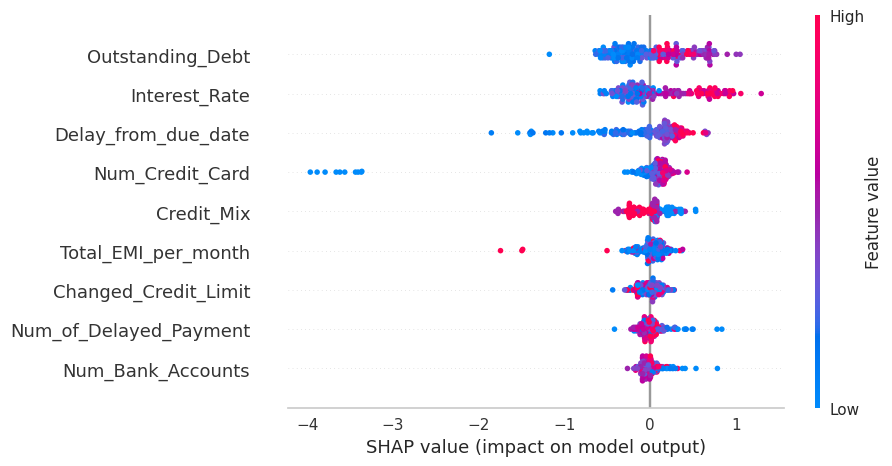

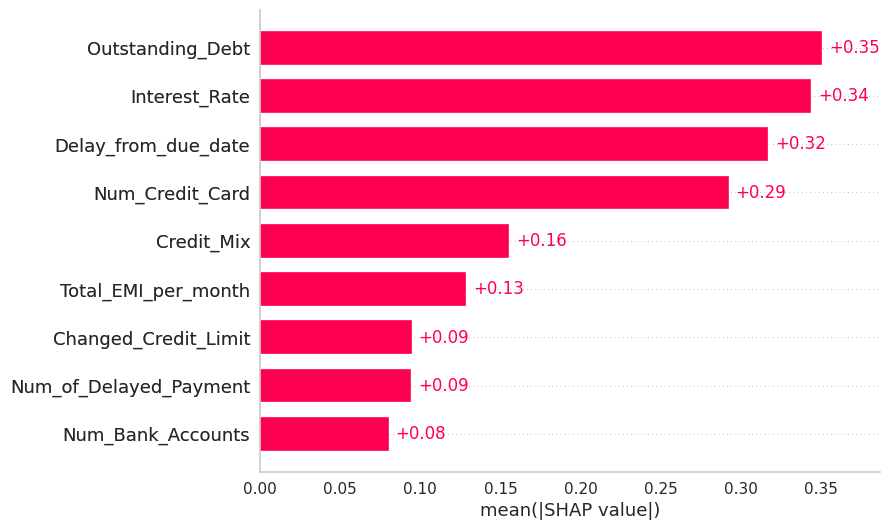

In [ ]:
# Beeswarm
shap.plots.beeswarm(
    shap_values_class,
    max_display=10
)

# Bar plot
shap.plots.bar(
    shap_values_class,
    max_display=10
)


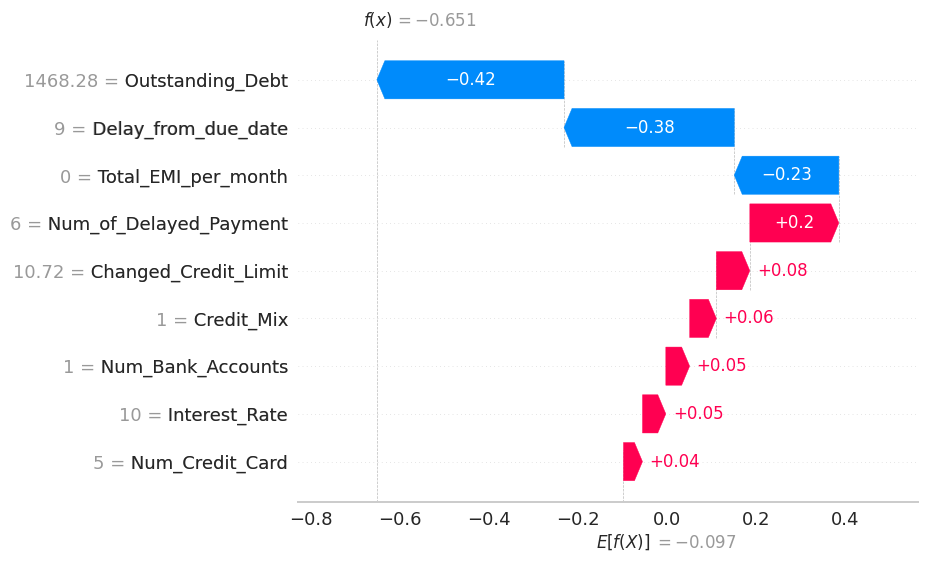

In [ ]:
i = 0

shap.plots.waterfall(
    shap_values_class[i],
    max_display=10
)


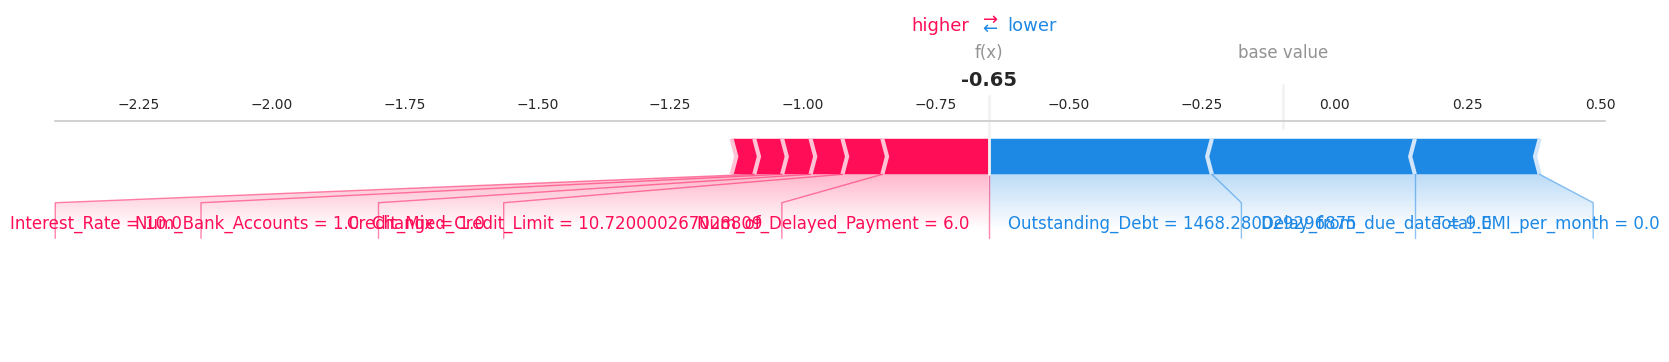

In [ ]:
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_class[i].values,
    X_shap.iloc[i],
    matplotlib=True
)


# Counterfactual Explanation: DICE

In [ ]:
!pip install dice-ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.4 MB/s eta 0:00:00


In [ ]:
import pickle
import pandas as pd
import numpy as np
import dice_ml
from dice_ml import Dice

# Load saved artifacts
xgb_model = pickle.load(open("xgb_final_model.pkl", "rb"))
ordinal_enc = pickle.load(open("final_ordinal_encoder.pkl", "rb"))
label_enc = pickle.load(open("final_label_encoder.pkl", "rb"))
model_features = pickle.load(open("final_feature_names.pkl", "rb"))

# Load dataset
df = pd.read_csv("train.csv")   # use TRAIN for DiCE



Prepare DiCE reference

In [ ]:
# Keep only model features
X_cf = df[model_features].copy()

# Clean + encode Credit_Mix
X_cf["Credit_Mix"] = (
    X_cf["Credit_Mix"]
    .astype(str)
    .str.strip()
    .str.title()
)

X_cf[["Credit_Mix"]] = ordinal_enc.transform(
    X_cf[["Credit_Mix"]]
)

X_cf = X_cf.astype(np.float32)

# Target in ORIGINAL STRING LABELS (important for DiCE)
y_cf = label_enc.inverse_transform(
    xgb_model.predict(X_cf)
)

# Final DiCE dataframe
data_cf = X_cf.copy()
data_cf["Credit_Score"] = y_cf


Create DiCE Data & Model objects

In [ ]:
dice_data = dice_ml.Data(
    dataframe=data_cf,
    continuous_features=[
        'Num_of_Delayed_Payment',
        'Num_Bank_Accounts',
        'Total_EMI_per_month',
        'Delay_from_due_date',
        'Changed_Credit_Limit',
        'Num_Credit_Card',
        'Outstanding_Debt',
        'Interest_Rate'
    ],
    outcome_name="Credit_Score"
)

dice_model = dice_ml.Model(
    model=xgb_model,
    backend="sklearn",
    model_type="classifier"
)

dice_exp = Dice(
    dice_data,
    dice_model,
    method="random"   # SAME as training
)


In [ ]:
# Pick a customer predicted as Poor
pred_labels = label_enc.inverse_transform(
    xgb_model.predict(X_cf)
)

poor_indices = np.where(pred_labels == "Poor")[0]
idx = poor_indices[0]

query_instance = X_cf.iloc[[idx]]


In [ ]:
# Features DiCE is allowed to change
features_to_vary = [
    'Num_of_Delayed_Payment',
    'Delay_from_due_date',
    'Interest_Rate',
    'Outstanding_Debt',
    'Total_EMI_per_month'
]

# Convert target label to index
target_class_idx = int(label_enc.transform(["Good"])[0])

# Generate counterfactuals
cf = dice_exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class=target_class_idx,
    features_to_vary=features_to_vary
)

cf.visualize_as_dataframe()


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.9' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.1' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype i

Query instance (original outcome : 1)


,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,11.000,8.000,70.478,30.000,17.130,7.000,1704.180,15.000,2.000,1



Diverse Counterfactual set (new outcome: 0)


,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,9.200,8.000,753.800,30.000,17.130,7.000,1704.180,15.000,2.000,0
1,21.600,8.000,736.500,30.000,17.130,7.000,1704.180,15.000,2.000,0
2,11.000,8.000,1593.100,30.000,17.130,7.000,3354.410,15.000,2.000,0


In [ ]:
original = cf.cf_examples_list[0].test_instance_df.iloc[0]
cf_example = cf.cf_examples_list[0].final_cfs_df.iloc[0]

print("🔍 COUNTERFACTUAL EXPLANATION\n")

for feature in original.index:
    if original[feature] != cf_example[feature]:
        print(
            f"- Change {feature} from {original[feature]:.2f} "
            f"to {cf_example[feature]:.2f}"
        )

print("\n➡ This would change the prediction from POOR to GOOD.")


🔍 COUNTERFACTUAL EXPLANATION

- Change Num_of_Delayed_Payment from 11.00 to 9.20
- Change Total_EMI_per_month from 70.48 to 753.80
- Change Credit_Score from 1.00 to 0.00

➡ This would change the prediction from POOR to GOOD.


# End of Model Training, Next is Streamlit (Running on Local PC)

Ready to run Streamlit local